Creating a jupyter notebook file to run the data processing/feature engineering commands

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [4]:
product_catalog_df = pd.read_csv("C:\\data\\Work\\data\\product_catalog_new.csv")

In [5]:
product_catalog_df

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Large,Ergonomic,Member,2129.87,Credit Card,Yes,219,19.09,131.49,10,Neutral
96,97,Garden Lounge Bench,Outdoor Furniture,Wood,Medium,Waterproof,Member,3011.10,Credit Card,Yes,806,7.79,144.57,10,Positive
97,98,Queen Bed with Storage,Bedroom Furniture,Wood,Medium,Minimalist,Member,999.36,Credit Card,No,71,17.95,149.06,8,Positive
98,99,Compact Shoe Rack,Storage & Organization,Plastic,Small,Durable,Normal,3186.13,Cash on Delivery,Yes,749,2.73,116.02,5,Positive


In [5]:
product_catalog_df.head()

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Durable,Normal,3895.12,Cash on Delivery,Yes,786,16.17,192.22,8,Neutral
1,2,Chaise Sofas,Sofas & Seating,Fabric,Medium,Ergonomic,Normal,2648.62,Cash on Delivery,No,233,3.34,11.09,2,Negative
2,3,2 Seater sofa,Sofas & Seating,Leather,Medium,Minimalist,Member,122.63,Cash on Delivery,No,635,13.02,149.57,2,Neutral
3,4,Ottoman Storage Bench,Storage & Organization,Fabric,Small,Ergonomic,Normal,730.69,Credit Card,Yes,935,10.02,135.43,4,Positive
4,5,Padded Dining Chair,Kitchen & Dining,Fabric,Small,Foldable,Normal,1478.47,Cash on Delivery,No,527,11.71,116.37,5,Neutral


In [6]:
product_catalog_df.describe

<bound method NDFrame.describe of     Product ID               Product Name                Category Material  \
0            1      Ottoman Storage Bench  Storage & Organization   Fabric   
1            2               Chaise Sofas         Sofas & Seating   Fabric   
2            3              2 Seater sofa         Sofas & Seating  Leather   
3            4      Ottoman Storage Bench  Storage & Organization   Fabric   
4            5        Padded Dining Chair        Kitchen & Dining   Fabric   
..         ...                        ...                     ...      ...   
95          96  Expandable Kitchen Island        Kitchen & Dining     Wood   
96          97   Industrial Console Table                  Tables    Metal   
97          98        King Size Bed Frame       Bedroom Furniture     Wood   
98          99       Large Wooden Dresser       Bedroom Furniture     Wood   
99         100          Modern TV Cabinet  Storage & Organization     Wood   

      Size Special_features C

In [7]:
column_list=(list(product_catalog_df.columns))
print(column_list)

['Product ID', 'Product Name', 'Category', 'Material', 'Size', 'Special_features', 'Customer Type', 'Price', 'Payment Type', 'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost', 'Seasonality Score', 'Implicit Feedback']


In [8]:
#Observing the different types of data

print("=============================================")
print("Data types of the columns in the data frame:", product_catalog_df.dtypes)
print("=============================================")
print("Shape of the data frame:", product_catalog_df.shape)
print("=============================================")
print("Information about the data frame:", product_catalog_df.info())
product_catalog_df.head()

Data types of the columns in the data frame: Product ID             int64
Product Name          object
Category              object
Material              object
Size                  object
Special_features      object
Customer Type         object
Price                float64
Payment Type          object
Sellable Online       object
Sales Volume           int64
Return Rate          float64
Storage Cost         float64
Seasonality Score      int64
Implicit Feedback     object
dtype: object
Shape of the data frame: (100, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         100 non-null    int64  
 1   Product Name       100 non-null    object 
 2   Category           100 non-null    object 
 3   Material           100 non-null    object 
 4   Size               100 non-null    object 
 5   Special_features   100 non

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Durable,Normal,3895.12,Cash on Delivery,Yes,786,16.17,192.22,8,Neutral
1,2,Chaise Sofas,Sofas & Seating,Fabric,Medium,Ergonomic,Normal,2648.62,Cash on Delivery,No,233,3.34,11.09,2,Negative
2,3,2 Seater sofa,Sofas & Seating,Leather,Medium,Minimalist,Member,122.63,Cash on Delivery,No,635,13.02,149.57,2,Neutral
3,4,Ottoman Storage Bench,Storage & Organization,Fabric,Small,Ergonomic,Normal,730.69,Credit Card,Yes,935,10.02,135.43,4,Positive
4,5,Padded Dining Chair,Kitchen & Dining,Fabric,Small,Foldable,Normal,1478.47,Cash on Delivery,No,527,11.71,116.37,5,Neutral


In [9]:
#Checking missing values
print(product_catalog_df.isnull().sum())

Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [10]:
print("Product Catalog Duplicates:", product_catalog_df.duplicated().sum())

Product Catalog Duplicates: 0



--- Checking Outliers (Boxplot) ---


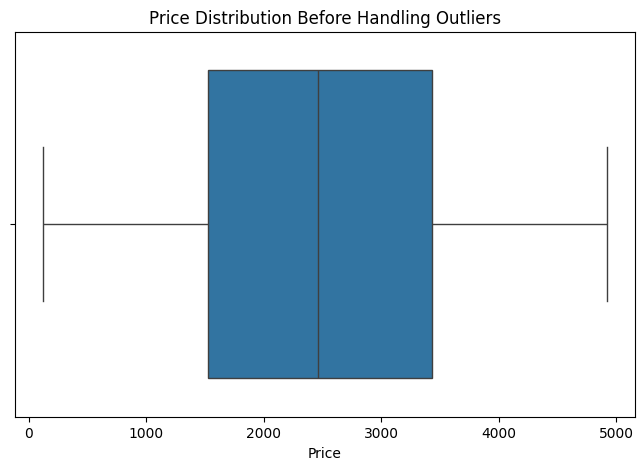

In [11]:
print("\n--- Checking Outliers (Boxplot) ---")
plt.figure(figsize=(8,5))
sns.boxplot(x=product_catalog_df["Price"])
plt.title("Price Distribution Before Handling Outliers")
plt.show()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_23272\1574029216.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)


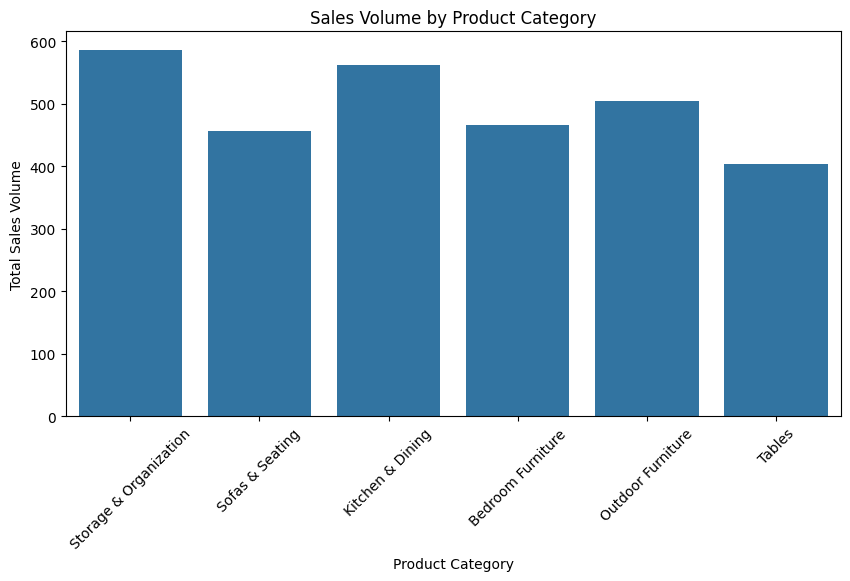

In [12]:
#Bar plot for products vs sales
plt.figure(figsize=(10,5))
sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)
plt.xticks(rotation=45)
plt.title("Sales Volume by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Volume")
plt.show()


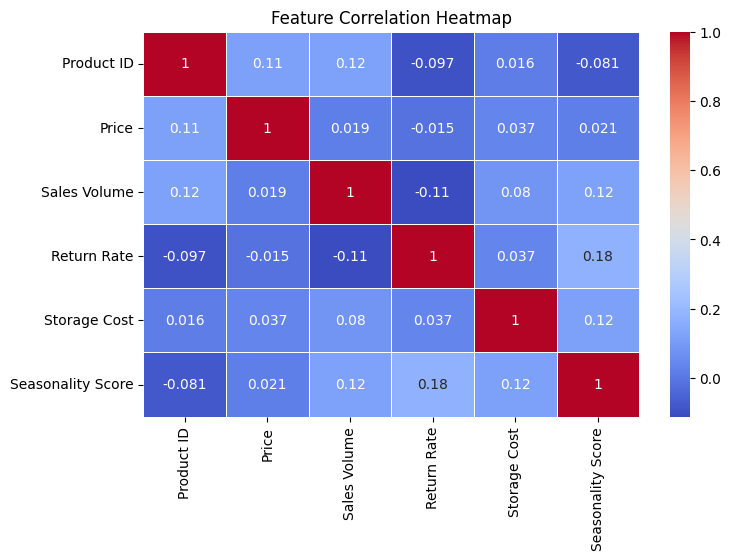

In [14]:
# Select only numerical columns for correlation
numeric_data = product_catalog_df.select_dtypes(include=["number"])

# Generate heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



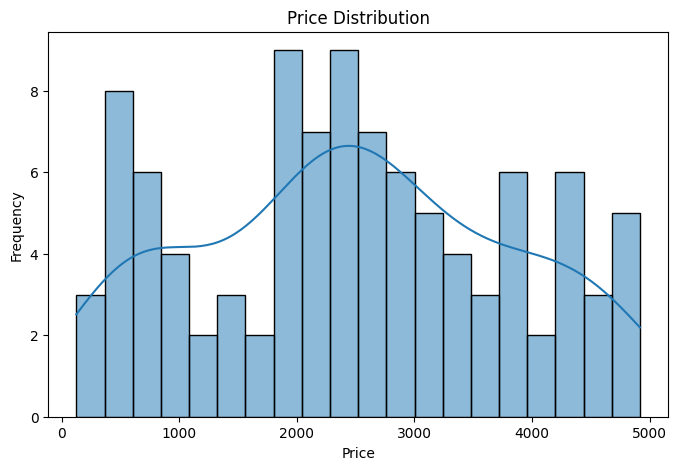

In [15]:
#return rate
plt.figure(figsize=(8,5))
sns.histplot(product_catalog_df["Price"], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Text(0, 0.5, '')

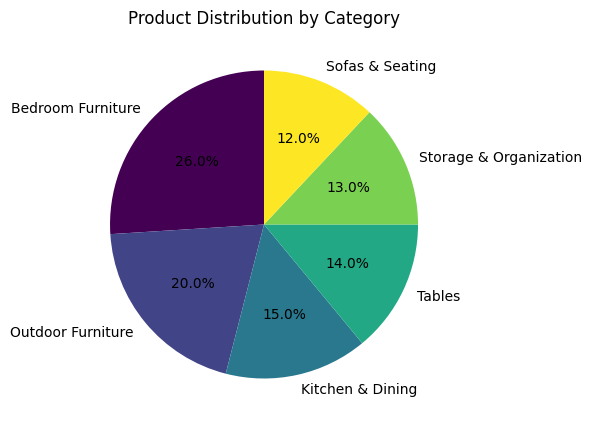

In [17]:
#product distribution
plt.figure(figsize=(8,5))
product_catalog_df["Category"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("Product Distribution by Category")
plt.ylabel("") 


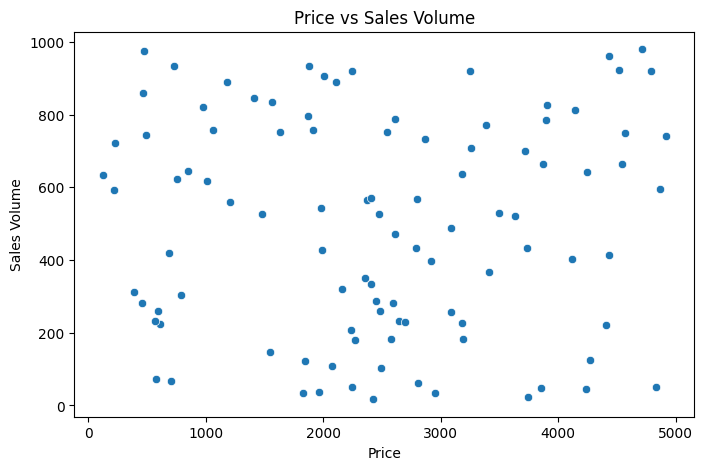

In [ ]:
#scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=product_catalog_df["Price"], y=product_catalog_df["Sales Volume"])
plt.title("Price vs Sales Volume")
plt.xlabel("Price")
plt.ylabel("Sales Volume")
plt.show()


In [19]:
print((product_catalog_df == "").sum())



Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [ ]:
#Standardizing categorical data
categorical_cols = ["Sellable Online", "Payment Type"]
for col in categorical_cols:
    if col in product_catalog_df.columns:
        product_catalog_df[col] = product_catalog_df[col].str.lower().str.strip()


In [23]:
scaler = StandardScaler()
scaled_cols = ["Price", "Sales Volume", "Return Rate", "Storage Cost", "Seasonality Score"]
product_catalog_df[scaled_cols] = scaler.fit_transform(product_catalog_df[scaled_cols])

In [ ]:
#converting data types
convert_types = {
    "Price": float,
    "Sales Volume": int,
    "Return Rate": float,
    "Storage Cost": float
}
for col, dtype in convert_types.items():
    if col in product_catalog_df.columns:
        product_catalog_df[col] = product_catalog_df[col].astype(dtype)

In [6]:
print(product_catalog_df["Product Name"].nunique())

30


In [ ]:
#Creating new features for the recommendation system
product_catalog_df["Sales_to_Return_Ratio"] = product_catalog_df["Sales Volume"] / (product_catalog_df["Return Rate"] + 1)  # Adding 1 to avoid division by zero


In [ ]:

product_catalog_df["Revenue_Per_Product"] = product_catalog_df["Sales Volume"] * product_catalog_df["Price"]


In [9]:
product_catalog_df["Storage_Efficiency_Score"] = product_catalog_df["Revenue_Per_Product"] / (product_catalog_df["Storage Cost"] + 1)  # Adding 1 to avoid division by zero


In [11]:
product_catalog_df["Online_Sellability_Score"] = product_catalog_df["Sellable Online"] * product_catalog_df["Sales Volume"]


In [14]:
threshold_sales = product_catalog_df["Sales Volume"].quantile(0.75)
product_catalog_df["High_Demand_Indicator"] = np.where(product_catalog_df["Sales Volume"] >= threshold_sales, 1, 0)


In [17]:
# Convert Implicit Feedback to numeric values
feedback_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
product_catalog_df["Implicit_Feedback_Score"] = product_catalog_df["Implicit Feedback"].map(feedback_mapping)

# Define Top Rated based on positive implicit feedback
product_catalog_df["Top_Rated"] = np.where(product_catalog_df["Implicit_Feedback_Score"] > 0, 1, 0)


In [ ]:
# Likelihood of Purchase
total_sales = product_catalog_df["Sales Volume"].sum()
product_catalog_df["Likelihood_of_Purchase"] = product_catalog_df["Sales Volume"] / (total_sales + 1)  # Adding 1 to avoid division by zero


In [19]:
#Expert Judgment Score 
product_catalog_df["Expert_Judgment_Score"] = (
    (product_catalog_df["High_Demand_Indicator"] * 1) +
    (product_catalog_df["Top_Rated"] * 1) +
    (product_catalog_df["Revenue_Per_Product"] > product_catalog_df["Revenue_Per_Product"].median()) * 1
)


In [25]:
numerical_features = ["Sales_to_Return_Ratio", "Revenue_Per_Product", "Storage_Efficiency_Score",
                      "Online_Sellability_Score", "High_Demand_Indicator", "Top_Rated"]

In [27]:
print(product_catalog_df.head())


   Product ID           Product Name                Category Material    Size  \
0           1   Kitchen Pantry Shelf        Kitchen & Dining     Wood  Medium   
1           2  Ottoman Storage Bench  Storage & Organization   Fabric   Large   
2           3       Rustic Bookshelf  Storage & Organization     Wood   Large   
3           4        Rattan Armchair         Sofas & Seating   Velvet  Medium   
4           5     Glass Dining Table                  Tables    Glass   Large   

  Special_features Customer Type    Price      Payment Type Sellable Online  \
0          Durable        Member  2530.23        Debit Card             Yes   
1         Foldable        Normal  1784.65        Debit Card             Yes   
2          Durable        Member  1325.18       Credit Card             Yes   
3          Durable        Member  1789.55  Cash on Delivery              No   
4          Durable        Normal  1915.92        Debit Card              No   

   ...  Implicit Feedback  Revenue_Per

In [28]:
print(product_catalog_df.dtypes)


Product ID                    int64
Product Name                 object
Category                     object
Material                     object
Size                         object
Special_features             object
Customer Type                object
Price                       float64
Payment Type                 object
Sellable Online              object
Sales Volume                  int64
Return Rate                 float64
Storage Cost                float64
Seasonality Score             int64
Implicit Feedback            object
Revenue_Per_Product         float64
Sales_to_Return_Ratio       float64
Storage_Efficiency_Score    float64
Online_Sellability_Score     object
High_Demand_Indicator         int64
Implicit_Feedback_Score       int64
Top_Rated                     int64
Likelihood_of_Purchase      float64
Expert_Judgment_Score         int64
dtype: object


In [37]:
print(product_catalog_df["Sellable Online"].unique())


['Yes' 'No']


In [40]:
product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].map({"Yes": 1, "No": 0})



In [41]:
product_catalog_df["Online_Sellability_Score"] = product_catalog_df["Sellable Online"] * product_catalog_df["Sales Volume"]


In [42]:
print(product_catalog_df[["Sellable Online", "Online_Sellability_Score"]].head(10))


   Sellable Online  Online_Sellability_Score
0                1                       217
1                1                       698
2                1                       973
3                0                         0
4                0                         0
5                1                       701
6                1                       319
7                1                       120
8                0                         0
9                1                       979


In [39]:
print(product_catalog_df.columns)


Index(['Product ID', 'Product Name', 'Category', 'Material', 'Size',
       'Special_features', 'Customer Type', 'Price', 'Payment Type',
       'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost',
       'Seasonality Score', 'Implicit Feedback', 'Revenue_Per_Product',
       'Sales_to_Return_Ratio', 'Storage_Efficiency_Score',
       'Online_Sellability_Score', 'High_Demand_Indicator',
       'Implicit_Feedback_Score', 'Top_Rated', 'Likelihood_of_Purchase',
       'Expert_Judgment_Score'],
      dtype='object')


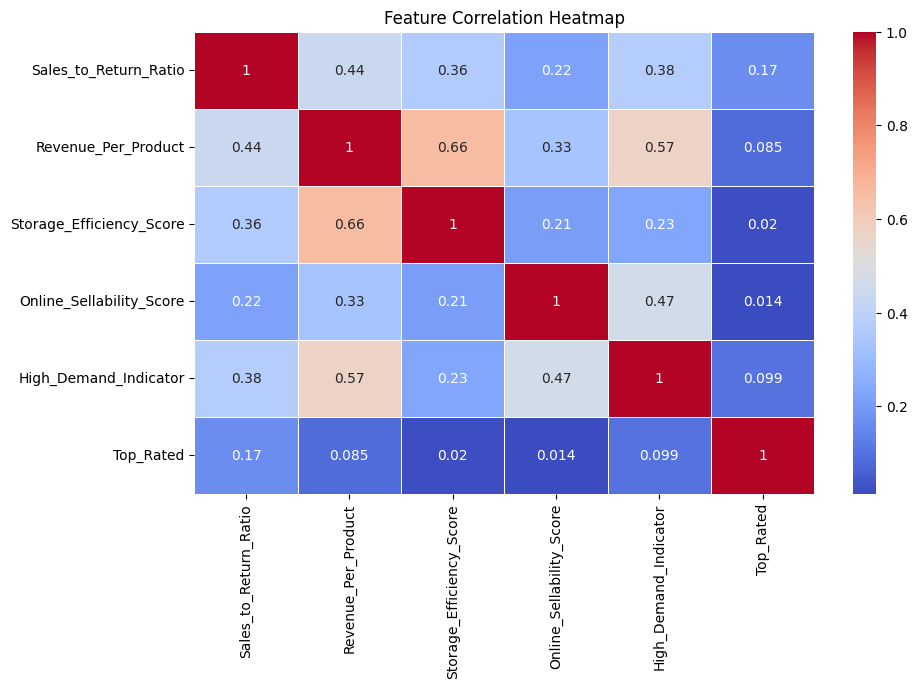

In [43]:
#Feature Correlation Map
plt.figure(figsize=(10, 6))
sns.heatmap(product_catalog_df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

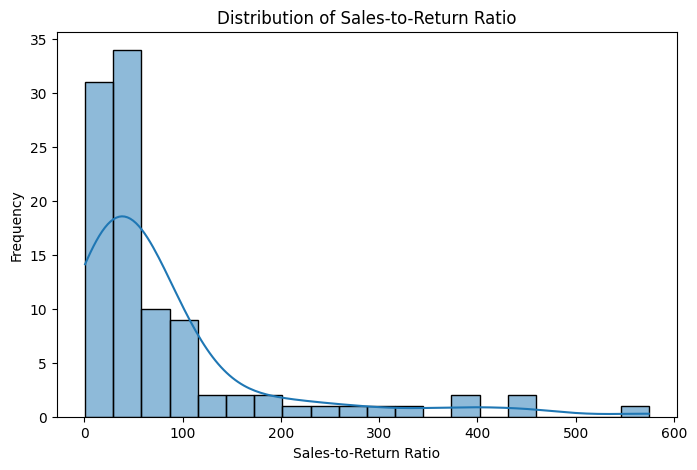

In [44]:
#Histogram
plt.figure(figsize=(8, 5))
sns.histplot(product_catalog_df["Sales_to_Return_Ratio"], bins=20, kde=True)
plt.title("Distribution of Sales-to-Return Ratio")
plt.xlabel("Sales-to-Return Ratio")
plt.ylabel("Frequency")
plt.show()

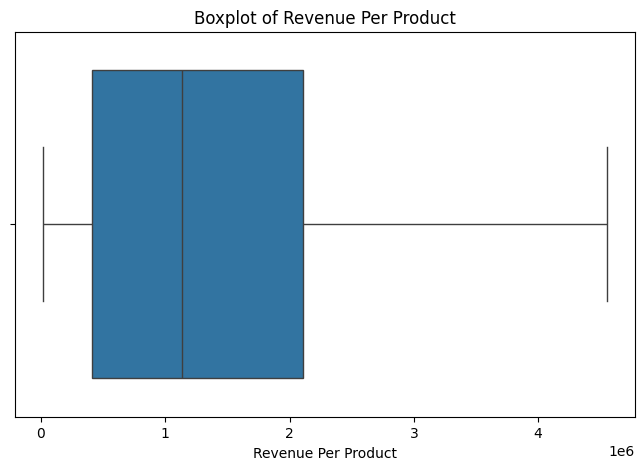

In [45]:
#Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=product_catalog_df["Revenue_Per_Product"])
plt.title("Boxplot of Revenue Per Product")
plt.xlabel("Revenue Per Product")
plt.show()


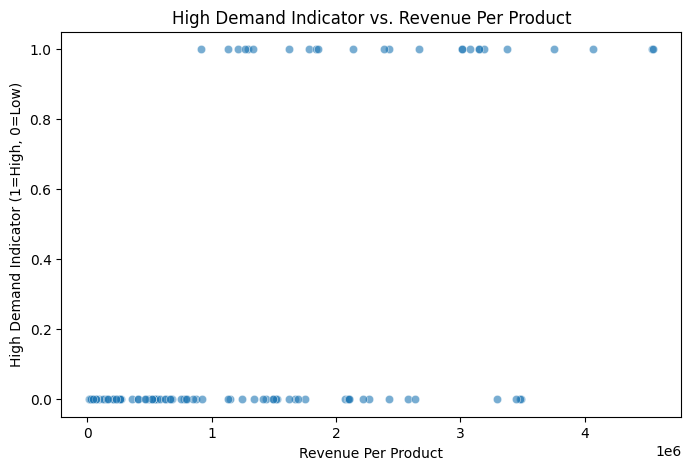

In [46]:
#Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=product_catalog_df["Revenue_Per_Product"], y=product_catalog_df["High_Demand_Indicator"], alpha=0.6)
plt.title("High Demand Indicator vs. Revenue Per Product")
plt.xlabel("Revenue Per Product")
plt.ylabel("High Demand Indicator (1=High, 0=Low)")
plt.show()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\3772209360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm")


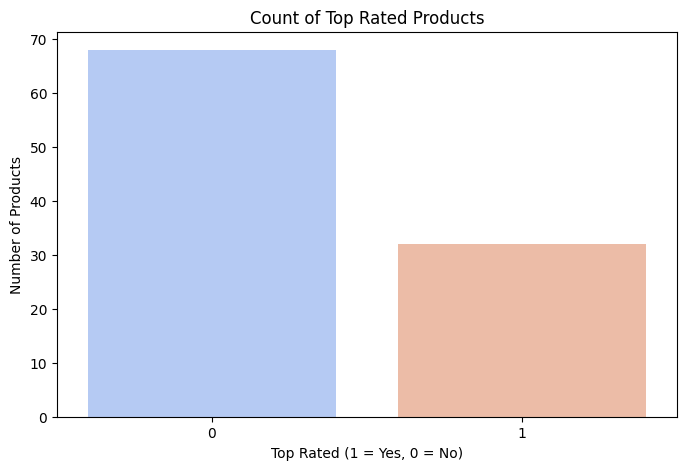

In [47]:
#Bar chart for top rated products
plt.figure(figsize=(8, 5))
sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm")
plt.title("Count of Top Rated Products")
plt.xlabel("Top Rated (1 = Yes, 0 = No)")
plt.ylabel("Number of Products")
plt.show()